
<center><h1 style="color:#a3a948">Proyecto Machine Learning Emely Berrocal</h1></center>

<center><h4 style="color:#ce1836">Universidad Castro Carazo</h4></center>

<h3 style="color:#ce1836">1. Carga de Librerias</h3>

<p>En primera instancia para el adcuado desarrollo de este proyecto es necesario generar la instalacion de dos librerias segun se detalla a continuacion:</p>

<table>
  <tr>
    <th><p>SQLALCHEMY:</p></th>
    <th><p>Esta Libreria es utilizada para generar consultas a bases de datos de aplicaciones informaticas, siendo estas una fuente para obtener la data necesria para generar el analisis de los datos que se nos puedan solicitar en las empresas.</th>
    <th><a href="https://anaconda.org/anaconda/sqlalchemy">Enlace para instalar</a></th>
    <th><a href="https://j2logo.com/python/sqlalchemy-tutorial-de-python-sqlalchemy-guia-de-inicio/">Referncias Web</a></th>
  </tr>
  <tr>
    <th><p>PYMYSQL:</p></th>
    <th><p>A traves de esta libreria se establece la coneccion a la base de datos donde se tiene que obtener la data para el analisis del los datos.</th>
    <th><a href="https://anaconda.org/anaconda/pymysql">Enlace para instalar</a></th>
    <th><a href="https://towardsdatascience.com/pymysql-connecting-python-and-sql-for-data-science-91e7582d21d7">Referncias Web</a></th>
  </tr>
   <tr>
    <th><p>PANDAS PROFILING:</p></th>
    <th><p>Esta Libreria se utiliza para genear un analsis rapido del set de datos, la idea es ahorrar tiempo en entender algunos elementos del set de datos e iniciar rapidamente con la limpieza y transformacion del mismo.</th>
    <th><a href="https://anaconda.org/conda-forge/pandas-profiling">Enlace para instalar</a></th>
    <th><a href="https://medium.com/saturdays-ai/an%C3%A1lisis-exploratorio-de-datos-con-pandas-profiling-cf13e0e4a8f5">Referncias Web</a></th>
  </tr>
</table>

In [1]:
pip install ipython

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import pandas_profiling

C:\Users\berro\AppData\Local\Temp\ipykernel_21256\4006275913.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


<p>Para poder obtener el set de datos por analizar es importante establecer la coneccion a la base de datos, siendo necesario realizar la confirguacion del String de Coneccion.
    
Estos son nuestros ajustes de configuración predeterminados para conectarse a una instancia de base de datos local. Tenga en cuenta que estos valores pueden variar según la configuración específica que haya creado para su esquema y base de datos.</p>

In [3]:
connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com',
user='deepAnalytics',
password='Sqltask1234!',
database='Credit',
charset='utf8mb4',
cursorclass=pymysql.cursors.DictCursor)

<p>Con la coneccion establecida, se debe generar la sentencia SQL generica para obtener todos los datos que se quieren analizar, esto se realiza a traves de sqlAlchemy</p>

In [4]:
df = pd.read_sql('SELECT * FROM credit', con=connection)

C:\Users\berro\AppData\Local\Temp\ipykernel_21256\3787531507.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM credit', con=connection)


In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default




<p style="text-aling:justify; font-weight: bold; color:#ff3b58">Generacion de archivo CSV para posterior carga y uso</p>

   
<th><p style="text-aling:justify">Con el set de datos cargado, y previo a finalizar con la primera etapa de carga de datos, se genera un respaldo de la informacion para posterior carga en caso de contingencia.</p></th>
  </tr>
</table>


In [6]:
df. to_csv ( 'BancoUno.csv' , header = False , index = False )

<h3 style="color:#ce1836">2. Analisis rapido del set de datos con Pandas Profiling</h3>

<p>Pandas Profiling genera un archivo HTML con una descripcion detallada de cada una de las variables que conforman el set de datos, es necesario realizar una exploracion paciente y detallada de la informacion que brinda esta herramienta para conocer que debe limpiarse y que debe transformarse</p>

In [7]:
credit = df

In [8]:
pandas_profiling.ProfileReport(credit)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]


<th><p style="text-aling:justify">Como se puede observar el Pandas Profilin detecto que existen 24 variables categoricas, que estan conformadas por 3 mil observaciones, tambien encontro la existencia de duplicados y que curiosamente pese a lo disponible en la meta data todas son categoricas.</p></th>
  </tr>
</table>

<h3 style="color:#ce1836">3. Limpieza y transformacion de los datos</h3>

<h5 style="color:#009989">Supresion de observaciones duplicadas</h5>

<p style="text-aling:justify">Segun ese analisis existen aproximadamanete 1.200 filas duplicadas, es necesario eliminar estas para evitar que al momento de analizar y conocer sobre el set de datos se generen estadisticas que no corresponden a la realidad, para esto utilizaremos la sentecia drop duplicates</p>

<th><p>Informacion sobre el uso del pandas drop duplicates, con ejemplos y parametros utilizados en esa funcion, cabe mencionar que en este ejercicio se utiliza simplemente para eliminar los duplicados identificados por el pandas profiling.</p></th>
<th><a href="https://pynative.com/pandas-drop-duplicates/">Enlace </a> </th>
  </tr>
</table>


In [9]:
credit.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)
credit.shape

(2397, 24)

<h5 style="color:#009989">Ajuste de encabezados del set de datos</h5>

<p style="text-aling:justify">Como se puede observar, los encabezados estan determinados por nombres como X1, X2 ... Xn de manera que estos no brindan mayor informacion sobre el tipo de dato que contiene cada variable, en ese sentido, la primera fila del set de datos esta asociado al nombre de los encabezados, vamos a proceder a cambiarlos para tener mayor claridad respecto a las variables.</p>


<th><p>Este paso es opcional, en caso de realizar este, es necesario que se tenga presente los datos en funcion de la meta data, de manera que siempre se puedan referenciar esos valores y dominios</p></th>
  </tr>
</table>


In [10]:
credit.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [11]:
encabezado = credit.loc[credit['X1'] == 'LIMIT_BAL']
df_list = encabezado.to_numpy().tolist()
print(df_list)

[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']]


In [12]:
credit.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [13]:
credit = credit.rename(columns={'X1':'LIMIT_BAL', 'X2':'SEX', 'X3':'EDUCATION', 'X4':'MARRIAGE',
                                'X5':'AGE', 'X6':'PAY_0', 'X7':'PAY_2', 'X8':'PAY_3', 'X9':'PAY_4',
                                'X10':'PAY_5', 'X11':'PAY_6','X12':'BILL_AMT1', 'X13':'BILL_AMT2',
                                'X14':'BILL_AMT3', 'X15':'BILL_AMT4', 'X16':'BILL_AMT5', 'X17':'BILL_AMT6',
                                'X18':'PAY_AMT1', 'X19':'PAY_AMT2', 'X20':'PAY_AMT3', 'X21':'PAY_AMT4',
                                'X22':'PAY_AMT5', 'X23':'PAY_AMT6', 'Y':'default payment next month (Y)'})

credit.drop([0], axis=0, inplace=True)
credit.reset_index(inplace=True, drop=False)
credit.head(5)

,index,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [14]:
credit.drop(['index'], axis=1,inplace=True)
credit.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


<h5 style="color:#009989">Normalizacion de las variables del set de datos</h5>

<p style="text-aling:justify">Una vez que se eliminaron las observaciones duplicadas, y de estandarizar los nombres de los encabezados de las columnas (variables), se procede normalizar cada variable para garantizar que cada una esta en su dominio correcto, sea numerica o categorica.</p>

In [15]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   LIMIT_BAL                       2396 non-null   object
 1   SEX                             2396 non-null   object
 2   EDUCATION                       2396 non-null   object
 3   MARRIAGE                        2396 non-null   object
 4   AGE                             2396 non-null   object
 5   PAY_0                           2396 non-null   object
 6   PAY_2                           2396 non-null   object
 7   PAY_3                           2396 non-null   object
 8   PAY_4                           2396 non-null   object
 9   PAY_5                           2396 non-null   object
 10  PAY_6                           2396 non-null   object
 11  BILL_AMT1                       2396 non-null   object
 12  BILL_AMT2                       2396 non-null   

In [16]:
credit[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 
        'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 
        'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 
        'PAY_AMT5', 'PAY_AMT6']] = credit[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 
        'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 
        'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 
        'PAY_AMT5', 'PAY_AMT6']].astype("int")

In [17]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   LIMIT_BAL                       2396 non-null   int32 
 1   SEX                             2396 non-null   object
 2   EDUCATION                       2396 non-null   object
 3   MARRIAGE                        2396 non-null   object
 4   AGE                             2396 non-null   int32 
 5   PAY_0                           2396 non-null   int32 
 6   PAY_2                           2396 non-null   int32 
 7   PAY_3                           2396 non-null   int32 
 8   PAY_4                           2396 non-null   int32 
 9   PAY_5                           2396 non-null   int32 
 10  PAY_6                           2396 non-null   int32 
 11  BILL_AMT1                       2396 non-null   int32 
 12  BILL_AMT2                       2396 non-null   

In [18]:
credit.to_excel("credit.xlsx")

<center><h1 style="color:#a3a948">Segunda parte Proyecto Machine Learning</h1></center>


<th><p style="text-aling:justify">El presente documento pretende documentar el analisis de datos del set trabajado para obtener conocimiento de su composicion y eventualmente generar algun informe de analitica para posibles tomas de decisiones.</p></th>
  </tr>
</table>



<h3 style="color:#ce1836">1. Carga de Librerias</h3>

<p>En primera instancia para el adcuado desarrollo de este proyecto es necesario generar la instalacion de dos librerias segun se detalla a continuacion:</p>

<table>
   <tr>
    <th><p>MATPLOTLIB:</p></th>
    <th><p>Esta Libreria se utiliza para graficar los datos, de manera que se genera una mejor visualizacion de la informacion disponible en el set de datos.</th>
    <th><a href="https://matplotlib.org/stable/gallery/index">Referencia Web</a></th>
  </tr>
</table>

In [19]:
import pandas as pd       
import numpy as np        
import matplotlib.pyplot as plt
import matplotlib as mpl

In [20]:
%matplotlib inline

In [21]:
connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com',
user='deepAnalytics',
password='Sqltask1234!',
database='Credit',
charset='utf8mb4',
cursorclass=pymysql.cursors.DictCursor)

<h3 style="color:#ce1836">2. Configuración para diseño de gráficos</h3>

<p>El diseño de los gráficos se configura con las lineas siguientes, de tal manera que se garantice que estos cumplen con las mejores prácticas para la visualización de datos, y para la generación de conocimiento de un proceso de negocio determinado, algunos insumos por considerar son los siguientes:</p>

<table>
   <tr>
    <th><p>Mejores Prácticas en Visualización de Datos:</p></th>
    <th><p>Las visualizaciones de datos son fundamentales para ayudar a las personas a comprender la información que se esconde dentro de los datos. Colocar los datos en contexto visual ayuda a poner de manifiesto patrones, tendencias y correlaciones que, de otro modo, podrían pasar desapercibidos. Para asegurarse de que sus visualizaciones de datos ofrezcan información concluyente, siga estas prácticas recomendadas.</th>
    <th><a href="https://help.highbond.com/helpdocs/highbond/es/Content/visualizations/quick_starts/data_visualization_bp.htm">Referencia Web</a></th>
  </tr>
    
  <tr>
    <th><p>4 consejos para dar formato al texto en matplotlib:</p></th>
    <th><p>Este es un articulo técnico con el propósito de brindar formato al texto de las gráficas generadas en matplotlib, dichos elementos se han implementado en este ejercicio.</th>
    <th><a href="https://medium.com/@gamoles/4-tips-para-dar-formato-al-texto-en-matplotlib-fa6c328ee9ab">Referencia Web</a></th>
  </tr>
    
  <tr>
    <th><p>Ejemplos de generacion de gráficos en matplotlib:</p></th>
    <th><p>Recurso donde se brindan codigos en python para la generación de gráficas en matplotlib, este insumo podría utilizarse para la implementación de algunas visualizaciones, en caso de ser necesario.</th>
    <th><a href="https://aprendepython.es/pypi/datascience/matplotlib/">Referencia Web</a></th>
  </tr>
    
  <tr>
    <th><p>Insumo sobre las mejores librerias para generar gráficas en python:</p></th>
    <th><p>Este artículo tiene como objetivo responder a esa pregunta proporcionando una comparación exhaustiva de algunas de las bibliotecas de visualización de Python más populares: Matplotlib, Seaborn, Plotly, Bokeh y la estrella emergente PyGWalker.</th>
    <th><a href="https://docs.kanaries.net/es/articles/best-python-visualization-library">Referencia Web</a></th>
  </tr>
</table>

In [22]:
mpl.rcParams["axes.spines.bottom"] = True
mpl.rcParams["axes.spines.left"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

<h3 style="color:#ce1836">3. Importación del Set de Datos</h3>

In [23]:
credit = pd.read_excel("credit.xlsx")
credit.head(3)


,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
0,0,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,1,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,2,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default


In [24]:
credit.drop(['Unnamed: 0'], axis=1,inplace=True)
credit.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


<h3 style="color:#ce1836">4. Análisis de Datos</h3>

In [25]:
credit.describe()

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,...,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000
mean,165834.724541,1.580134,35.419866,0.004591,-0.136477,-0.151920,-0.249165,-0.259599,-0.282137,51199.401085,...,45511.918614,41544.281302,39992.825125,38797.298414,5548.942821,5220.050501,4855.443656,4891.429883,4984.977880,5149.928631
std,129493.683277,0.525593,9.452344,1.123473,1.207902,1.247411,1.176359,1.156723,1.181852,77872.623393,...,69632.762068,68117.135902,64327.134703,65468.199929,13701.948666,14616.927369,22156.285391,14252.068389,16896.223773,20076.659470
min,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,...,-9850.000000,-7905.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3125.000000,...,2296.750000,1856.000000,1524.000000,1012.000000,997.500000,588.000000,247.750000,240.000000,247.750000,0.000000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21111.500000,...,19468.500000,17918.500000,17588.500000,15819.500000,2117.500000,2000.000000,1443.000000,1500.000000,1500.000000,1328.000000
75%,230000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62921.250000,...,56221.750000,49304.000000,48517.750000,47369.500000,5002.250000,4921.750000,4000.000000,4000.000000,4000.000000,4000.000000
max,1000000.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,964511.000000,...,548020.000000,891586.000000,927171.000000,961664.000000,239104.000000,285138.000000,896040.000000,205000.000000,332000.000000,528666.000000


In [26]:
bins = np.linspace(21,75,12)
bins

array([21.        , 25.90909091, 30.81818182, 35.72727273, 40.63636364,
       45.54545455, 50.45454545, 55.36363636, 60.27272727, 65.18181818,
       70.09090909, 75.        ])

In [27]:
groupNames = ["21-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55", "55-60", "60-65", "65-70", "70-75"]
credit['AGE_BINS'] = pd.cut(credit["AGE"], bins, labels=groupNames, include_lowest=True)

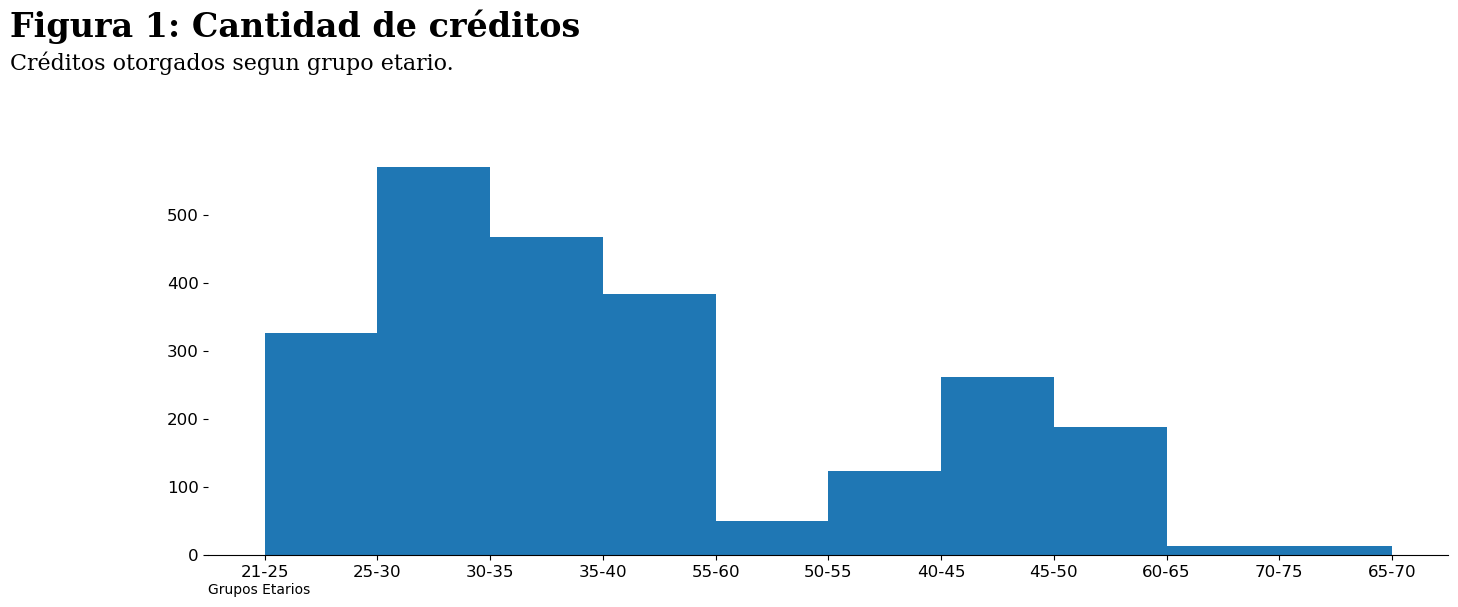

In [28]:
fig,ax=plt.subplots(1,1,figsize=(16,6.9),dpi=100)

plt.hist(credit["AGE_BINS"])

title_t = "Figura 1: Cantidad de créditos"
ax.set_title(title_t,
             horizontalalignment = 'left',
             x=0.001,
             y=0.86,
             transform=fig.transFigure,
             fontsize=24,
             fontweight="bold",
             fontfamily="serif")

subtitle_t = 'Créditos otorgados segun grupo etario.'
plt.suptitle(subtitle_t,
            horizontalalignment = "left",
            x = 0.001,
            y = 0.84,
            transform = fig.transFigure,
            fontsize=16,
            fontweight="regular",
            fontfamily="serif")


label = "Grupos Etarios"
ax.set_xlabel(label,
             ha="left",
             fontsize=10,
             fontweight="regular",
             fontfamily="sans")

ax.xaxis.set_label_coords(x=0,
                          y=-0.07,
                          transform=ax.transAxes)

ax.tick_params(axis='both',
               labelsize=12)

plt.subplots_adjust(top=0.70)

plt.show()

In [29]:
dfGraf = credit.groupby(['MARRIAGE']).count()
dfGraf = dfGraf.iloc[:,:1]
dfGraf

,LIMIT_BAL
MARRIAGE,
0,6
1,1027
2,1330
3,33


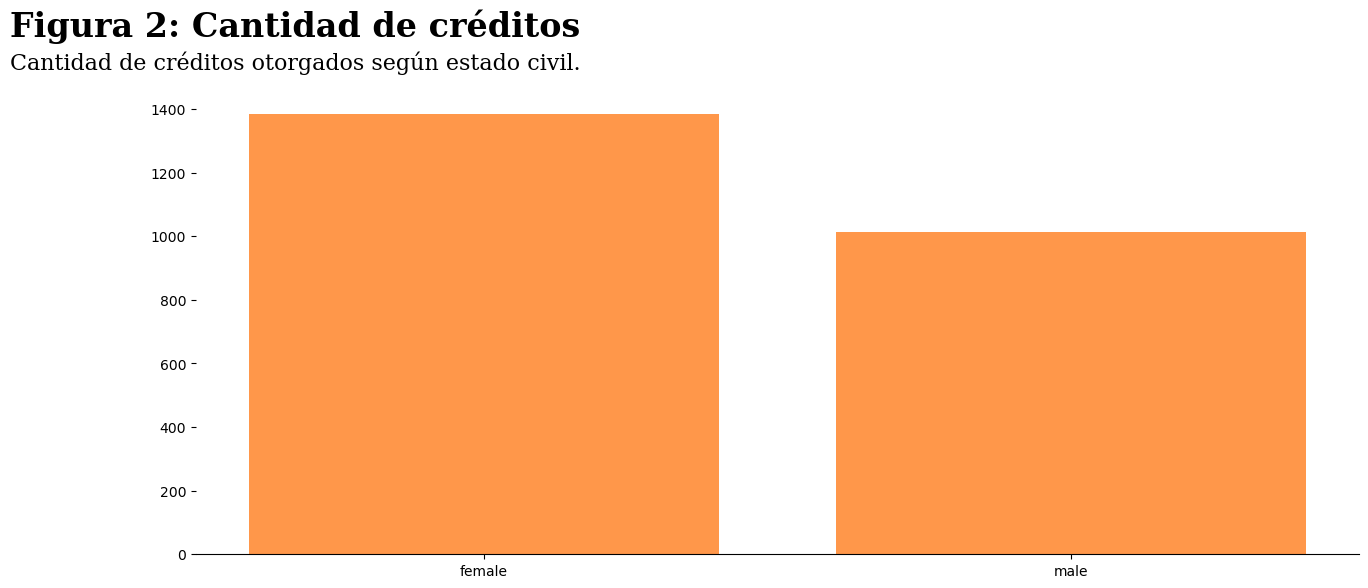

In [53]:
fig,ax=plt.subplots(1,1,figsize=(15,6.9),dpi=100)

estCivil =dfGraf.index.tolist()
counts =dfGraf['LIMIT_BAL'].tolist()

bar_colors = ['#ff974a', '#ff974a', "#9ec6b8", '#ff974a']
ax.bar(estCivil, counts, label="Estado Civil", color=bar_colors)


title_t = "Figura 2: Cantidad de créditos"
ax.set_title(title_t,
             horizontalalignment = 'left',
             x=0.001,
             y=0.86,
             transform=fig.transFigure,
             fontsize=24,
             fontweight="bold",
             fontfamily="serif")

subtitle_t = 'Cantidad de créditos otorgados según estado civil.'
plt.suptitle(subtitle_t,
            horizontalalignment = "left",
            x = 0.001,
            y = 0.84,
            transform = fig.transFigure,
            fontsize=16,
            fontweight="regular",
            fontfamily="serif")


plt.subplots_adjust(top=0.78)

plt.show()

In [30]:
dfGraf = credit.groupby(['EDUCATION']).count()
dfGraf = dfGraf.iloc[:,:1]
dfGraf

,LIMIT_BAL
EDUCATION,
graduate school,909
high school,392
other,18
university,1077


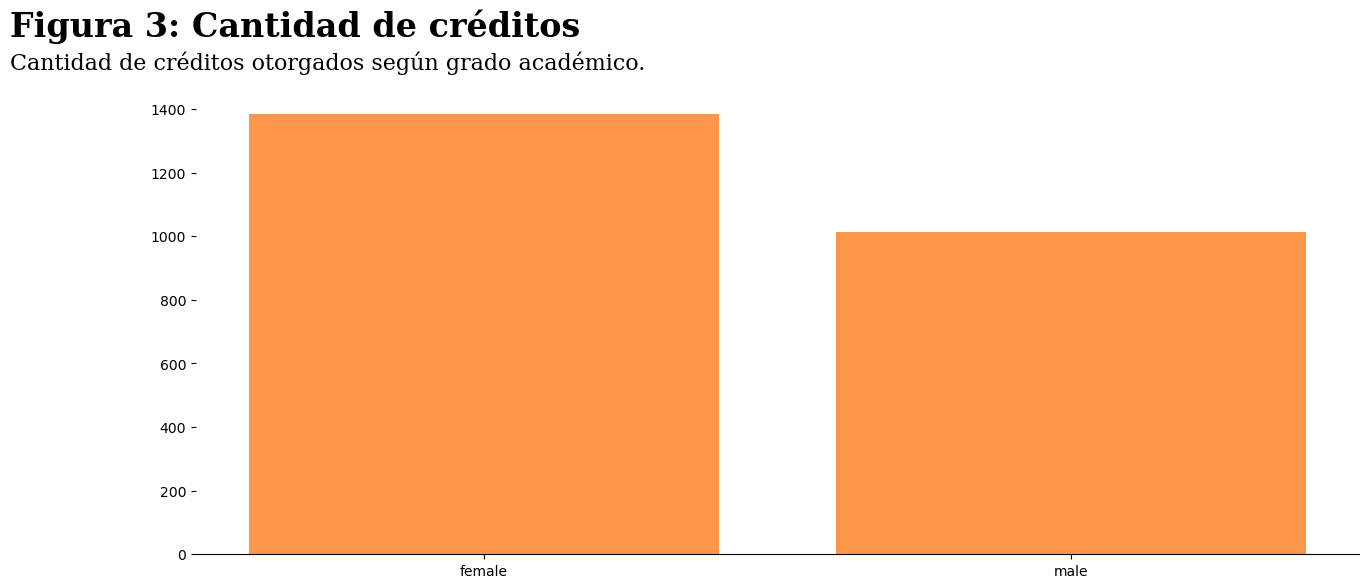

In [54]:
fig,ax=plt.subplots(1,1,figsize=(15,6.9),dpi=100)

educacion =dfGraf.index.tolist()
counts =dfGraf['LIMIT_BAL'].tolist()

bar_colors = ['#ff974a', '#ff974a', '#ff974a', "#9ec6b8"]
ax.bar(educacion, counts, label="Grado Académico", color=bar_colors)


title_t = "Figura 3: Cantidad de créditos"
ax.set_title(title_t,
             horizontalalignment = 'left',
             x=0.001,
             y=0.86,
             transform=fig.transFigure,
             fontsize=24,
             fontweight="bold",
             fontfamily="serif")

subtitle_t = 'Cantidad de créditos otorgados según grado académico.'
plt.suptitle(subtitle_t,
            horizontalalignment = "left",
            x = 0.001,
            y = 0.84,
            transform = fig.transFigure,
            fontsize=16,
            fontweight="regular",
            fontfamily="serif")


plt.subplots_adjust(top=0.78)

plt.show()

In [31]:
dfGraf = credit.groupby(['SEX']).count()
dfGraf = dfGraf.iloc[:,:1]
dfGraf

,LIMIT_BAL
SEX,
female,1384
male,1012


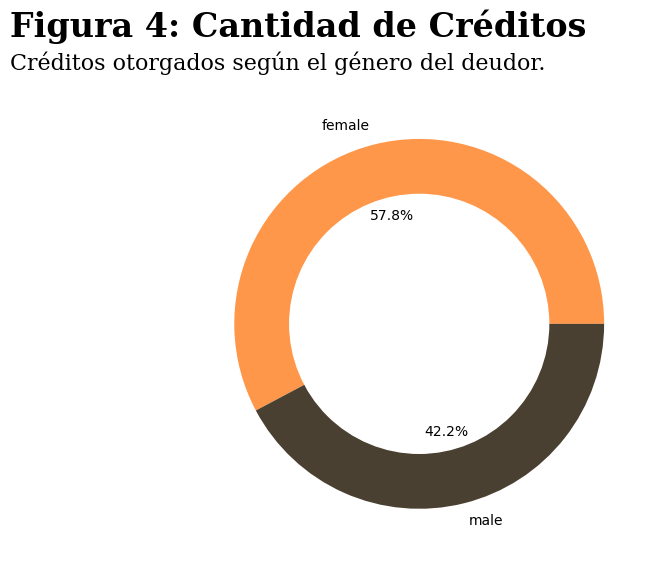

In [55]:
names =dfGraf.index.tolist()
style =dfGraf['LIMIT_BAL'].tolist()
fig,ax=plt.subplots(1,1,figsize=(8,6.9),dpi=100)
circulo = plt.Circle((0,0), 0.7, color="white")  

plt.pie(style, 
        labels=names, 
        autopct='%1.1f%%', 
        colors=['#ff974a','#4a4031'])



title_t = "Figura 4: Cantidad de Créditos"
ax.set_title(title_t,
             horizontalalignment = 'left',
             x=0.001,
             y=0.86,
             transform=fig.transFigure,
             fontsize=24,
             fontweight="bold",
             fontfamily="serif")

subtitle_t = 'Créditos otorgados según el género del deudor.'
plt.suptitle(subtitle_t,
            horizontalalignment = "left",
            x = 0.001,
            y = 0.84,
            transform = fig.transFigure,
            fontsize=16,
            fontweight="regular",
            fontfamily="serif")


plt.subplots_adjust(top=0.78)


p = plt.gcf()
p.gca().add_artist(circulo)
plt.show()

In [32]:
import pandas as pd       
import numpy as np       
import matplotlib.pyplot as plt 
import matplotlib as mpl


from sklearn import linear_model  
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

In [33]:
credit = pd.read_excel("credit.xlsx")
credit.drop(['Unnamed: 0'], axis=1,inplace=True)
credit.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default


In [34]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month (Y)'],
      dtype='object')

In [35]:
credit = credit.rename(columns={'default payment next month (Y)':'Y'})

<h3 style="color:#ce1836">3. Reducción  de Características</h3>

<p>Uno de los elementos principales para generar mayor eficiencia en los algoritmos de Machine Learning, se centra en la reducción de las características, para esto vamos a utilizar el algoritmo de Analisis Principal de Componentes (PCA), en este caso se manejaran 2 componentes principales.
</br>
</br>
Una vez aplicado ese algoritmo se procederá al analisis de la viabilidad de implementar un algoritmo de regresion lineal simple o multiple.</p>

<table>
   <tr>


In [36]:
features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
             'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
            'PAY_AMT5', 'PAY_AMT6']

x = credit.loc[:, features].values

y = credit.loc[:,['Y']].values

x = StandardScaler().fit_transform(x)
print (x)

[[-1.12642689 -1.20840397  1.77647823 ... -0.34328006 -0.29509662
  -0.25656677]
 [-0.35402725 -0.99677208 -0.89437003 ... -0.27310016 -0.29509662
  -0.15692781]
 [-0.58574714 -0.15024451 -0.00408727 ... -0.27310016 -0.23589944
  -0.00746937]
 ...
 [-0.27678728 -1.20840397  0.88619548 ... -0.27302998 -0.23951047
  -0.20609964]
 [-0.43126721 -0.89095613 -0.00408727 ... -0.22411459 -0.18197081
  -0.16649315]
 [ 0.26389247 -0.67932424 -0.00408727 ... -0.20965753 -0.29438625
   0.0036902 ]]


In [37]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

principalDf.head(10)

,principal_component_1,principal_component_2
0,-1.870265,-0.761328
1,-0.767845,-2.018212
2,-0.832976,-0.968937
3,-0.222358,-0.818195
4,-0.713468,0.111325
5,-0.213885,-0.812271
6,13.819351,6.281666
7,-1.785742,-0.355043
8,-0.697267,-1.563658
9,-2.741161,1.646894


In [38]:
finalDf = pd.concat([principalDf, credit[['Y']]], axis = 1)
finalDf.head(10)

,principal_component_1,principal_component_2,Y
0,-1.870265,-0.761328,default
1,-0.767845,-2.018212,default
2,-0.832976,-0.968937,not default
3,-0.222358,-0.818195,not default
4,-0.713468,0.111325,not default
5,-0.213885,-0.812271,not default
6,13.819351,6.281666,not default
7,-1.785742,-0.355043,not default
8,-0.697267,-1.563658,not default
9,-2.741161,1.646894,not default


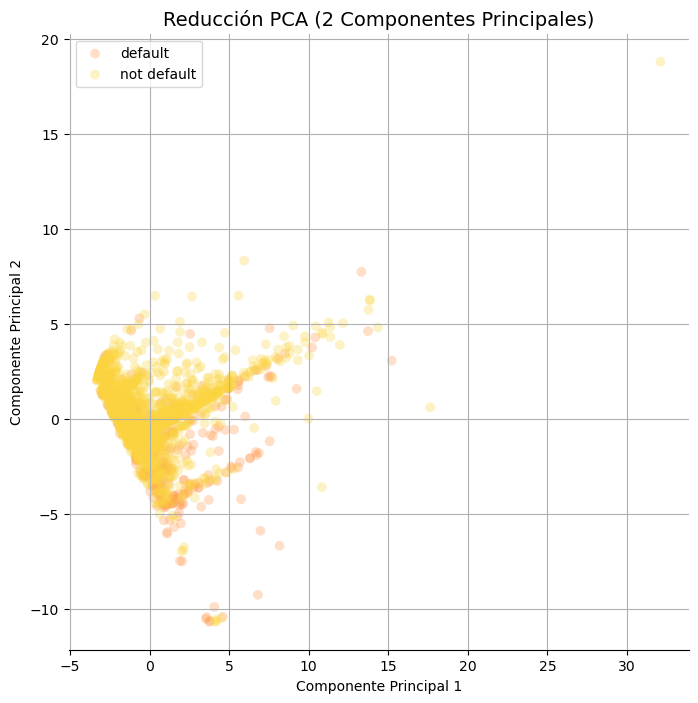

In [57]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Componente Principal 1', fontsize = 10)
ax.set_ylabel('Componente Principal 2', fontsize = 10)
ax.set_title('Reducción PCA (2 Componentes Principales)', fontsize = 14)

targets = ['default', 'not default']
colors = ['#ff974a','#fbd53f']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal_component_1']
               , finalDf.loc[indicesToKeep, 'principal_component_2']
               , c = color
               , s = 50
               ,alpha=0.3
               ,edgecolors='none')
ax.legend(targets)
ax.grid()

In [40]:
pca.explained_variance_ratio_

array([0.3357123 , 0.20397228])

<h3 style="color:#a3a948">4. Analisis Implementacion MRL</h3>

<p>Para la implementacion de un modelo de regresion lineal, es fundamental disponer de la variable dependiente en dominio numerico y consecutivo, esto es requerido para la implementacion del MRL simple o multiple, caso contrario se podria estar ante la posibilidad de implementar un MRL Logistico, o un algoritmo de clasificacion, esto por cuanto la variable a predecir unicamente contiene dos posibles valores.

</br>

Por lo tanto:</p>

<td Style='text-align: justify; font-style: normal; font-weight: normal'>CON ESTE SET DE DATOS NO ES VIABLE IMPLEMENTAR UN ALGORIMO DE REGRESION LINEAL SIMPLE O MULTIPLE</td>
</tr>
</table>

<h3 style=<h3"color:#ce1836">5. Comprobación sobre la Implementacion MRL</h3>

<p>Con el proposito de demostrar que nos es viable el desarrollo del MRL Simple o MRL Multiple se genera el codigo siguiente.

</br>
</br>
Visualización de los datos del Data Frame una vez aplicado el PCA:</p>>5. Comprobación sobre la Implementacion MRL</h3>

<p>Con el proposito de demostrar que nos es viable el desarrollo del MRL Simple o MRL Multiple se genera el codigo siguiente.

</br>
</br>
Visualización de los datos del Data Frame una vez aplicado el PCA:</p>

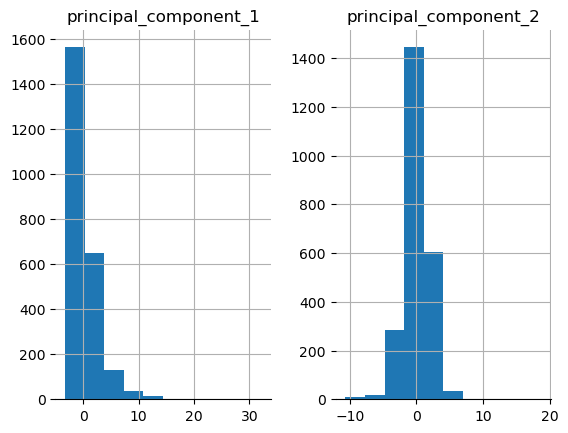

In [41]:
viz = finalDf[['principal_component_1','principal_component_2','Y']]
viz.hist()
plt.show()

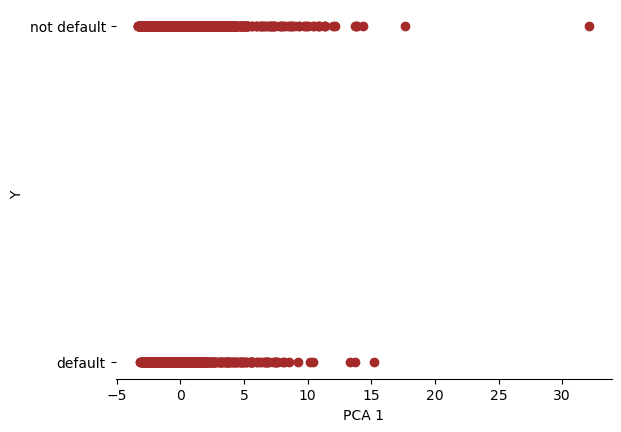

In [50]:
plt.scatter(finalDf.principal_component_1, finalDf.Y,  color='brown')
plt.xlabel("PCA 1")
plt.ylabel("Y")
plt.show()

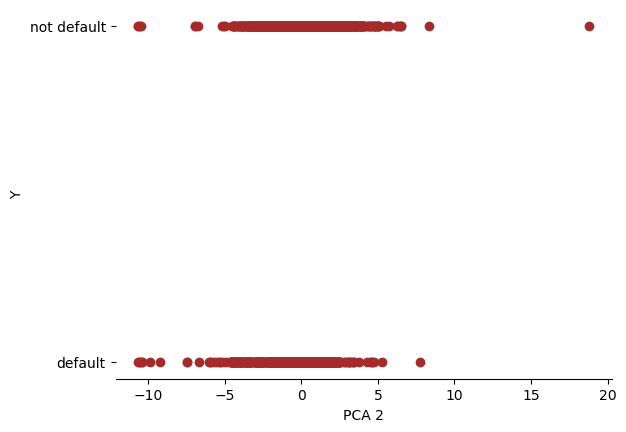

In [51]:
plt.scatter(finalDf.principal_component_2, finalDf.Y,  color='brown')
plt.xlabel("PCA 2")
plt.ylabel("Y")
plt.show()


<th><p style="text-aling:justify">Como se puede aprecier al momento de graficar los datos para conocer su distribución, se visualiza que por la conformación de la variable Y, no es posible motivar la implementacion de alguno de los algoritmos de machine learning abordados durante el desarrollo del curso.</p></th>
  </tr>
</table>


<th><p style="text-aling:justify">Muchas gracias</p></th>
  </tr>
</table>